---
# <center> Лабораторна робота №3 </center>
## __Тема. Аналіз складності алгоритмів. Алгоритми сортування__
## __Мета:__ освоїти аналіз складності алгоритмів як технологію на прикладі алгоритмів сортування методами включення та обміну.
---

## <center> Хід роботи </center>

### 3. Виконати теоретичні розрахунки асимптотичної складності алгоритмів cортування методами вставляння та бульбашки.

# Алгоритм сортування вставками

Сортування вставками реалізується шляхом поступового розміщення кожного елемента масиву на відповідне місце у вже відсортованій частині.

## Часова складність

### Загальний випадок:
Для кожного елемента масиву необхідно виконати порівняння з усіма попередніми елементами.

- **Кількість порівнянь:**
  $$
  T(n) = \sum_{i=1}^{n-1} i = \frac{(n-1)n}{2} \in O(n^2)
  $$

- **Кількість обмінів:**  
  Пропорційна $O(n^2)$.

Таким чином:
$$
T(n) \in O(n^2)
$$

### Найкращий випадок:
Якщо масив уже відсортований, алгоритм виконує лише перевірки.

- **Час виконання:**
  Один прохід без необхідності обмінів.

- **Кількість порівнянь:**
  $$
  T(n) = n-1 \in O(n)
  $$

### Середній випадок:
В середньому кожен елемент вимагає виконання половини обмінів на кожному проході.

- **Час виконання:**
  - **Кількість порівнянь:**
  $$
  T(n) = \frac{1}{2} \cdot \frac{(n-1)n}{2} \in O(n^2)
  $$


### 4. Реалізовуємо на Python алгоритм сортування методом бульбашки

In [3]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

arr = [43243, 25, 52, 38, 15, 95, 10309]
print("Вихідний масив:", arr)
bubble_sort(arr)
print("Відсортований масив:", arr)

Вихідний масив: [43243, 25, 52, 38, 15, 95, 10309]
Відсортований масив: [15, 25, 38, 52, 95, 10309, 43243]


### 5. Досліджуємо реальний час виконання обох алгоритмів на Python і будуємо графіки залежностей $T_{insert}(n)$ та $T_{buble}(n)$ для n = [5, 10, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 50000, 100000], згенерувавши відповідні цілочисельні масиви.(я зробив менше, тому що компілювання буде дуже довгим :( )

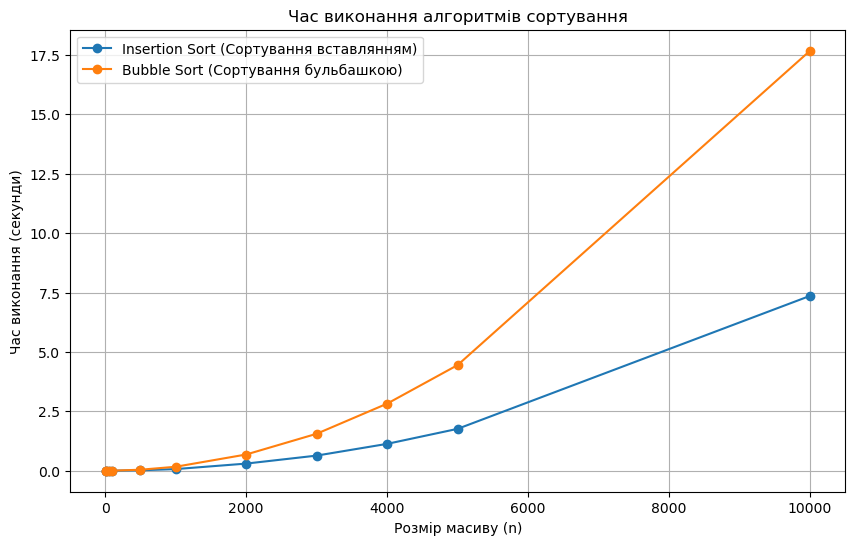

In [9]:
import time
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, List

def insertion_sort(arr: List[int]) -> None:

    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def bubble_sort(arr: List[int]) -> None:
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

def measure_time(sort_func: Callable[[List[int]], None], arr: List[int]) -> float:
    start_time = time.time()
    sort_func(arr.copy()) 
    end_time = time.time()
    return end_time - start_time

n_values = [5, 10, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 10000]
t_insertion = []
t_bubble = []

for n in n_values:
    test_array = np.random.randint(0, 10000, n) 
    t_insertion.append(measure_time(insertion_sort, test_array))
    t_bubble.append(measure_time(bubble_sort, test_array))

plt.figure(figsize=(10, 6))
plt.plot(n_values, t_insertion, label="Insertion Sort (Сортування вставлянням)", marker='o')
plt.plot(n_values, t_bubble, label="Bubble Sort (Сортування бульбашкою)", marker='o')
plt.xlabel("Розмір масиву (n)")
plt.ylabel("Час виконання (секунди)")
plt.title("Час виконання алгоритмів сортування")
plt.legend()
plt.grid(True)
plt.show()


### 1. Що таке O-нотація і чим вона відрізняється від Ω -нотації?

**О-нотація (Big-O)** показує, як швидко зростає час роботи алгоритму в найгіршому випадку, тобто визначає його верхню межу.

**Ω-нотація (Big-Omega)**, у свою чергу, характеризує найкращий сценарій виконання алгоритму, тобто його нижню межу.

Ці нотації використовуються для аналізу ефективності алгоритмів, дозволяючи оцінити, як вони поводяться при збільшенні розміру вхідних даних.


### 2. Яку часову складність має алгоритм сортування методом вставляння за найсприятливіших умов, коли масив відсортовано? Відповідь обґрунтувати.
### Аналіз алгоритмів: найкращий випадок, ефективність та асимптотична складність

### Найкращий випадок для сортування вставлянням
У найкращому випадку, коли масив вже відсортований, алгоритм **сортування вставлянням** працює з часовою складністю $O(n)$.  
Це відбувається тому, що кожен елемент порівнюється лише з попереднім, і жодних перестановок не потрібно.


### 3. Надати визначення ефективного алгоритму.
### Що таке ефективний алгоритм?
Ефективний алгоритм:
- вирішує задачу за адекватний час;
- мінімізує використання ресурсів, таких як пам'ять і процесорна потужність.  

Такий алгоритм повинен забезпечувати достатню продуктивність, щоб бути придатним для практичного застосування.

### 4. Пояснити поняття головного параметра (розміру) завдання.
### Основний параметр задачі
Основний параметр задачі — це величина, яка визначає обсяг вхідних даних і впливає на складність роботи алгоритму.  
Наприклад:
- для алгоритмів сортування — це кількість елементів у масиві;
- для роботи з текстом — кількість символів у рядку.


### 5. Функція часової складності має вигляд: F(N) = N 3 + 7N 2 − 14N. Як записати асимптотичну складність у O-нотації?
### Асимптотична складність
Асимптотична складність у $O$-нотації для функції  
$𝐹(𝑁) = 𝑁^3 + 7𝑁^2 − 14𝑁$  
записується як $𝑂(𝑁^3)$.  

Це тому, що $𝑁^3$ є домінуючим членом у функції при великих $𝑁$, а менш значущі члени ($7𝑁^2$ та $-14𝑁$) відкидаються.